In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:

# Load the dataset
df = pd.read_csv('BTC-USD.csv')


In [4]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
# Display the first few rows of the dataset
print(df.head())

        Date        Open        High         Low       Close   Adj Close  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1 2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2 2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3 2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4 2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  


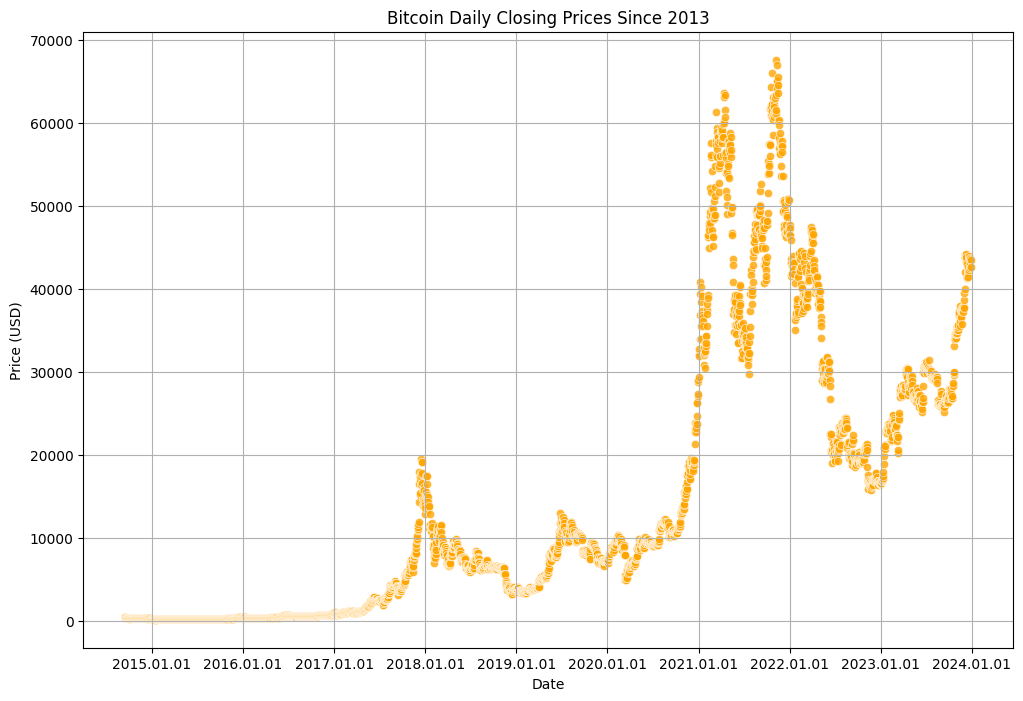

In [6]:
# Plot Bitcoin daily closing prices over time
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Date', y='Close', alpha=0.8, color='orange')
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title("Bitcoin Daily Closing Prices Since 2013")
plt.grid(True)
plt.show()


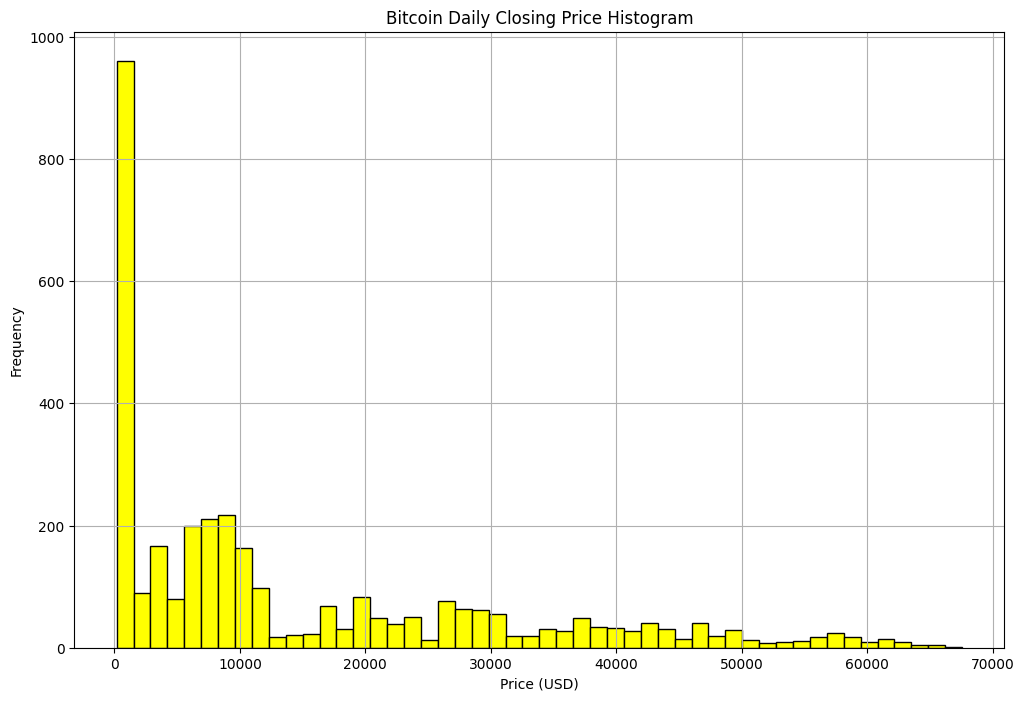

In [7]:
# Plot a histogram of Bitcoin daily closing prices
plt.figure(figsize=(12, 8))
plt.hist(df['Close'], bins=50, edgecolor='k', color='yellow')
plt.title('Bitcoin Daily Closing Price Histogram')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [8]:

# Load the dataset again to prepare for predictions
bitcoin_df = pd.read_csv('BTC-USD.csv')

In [9]:
# Define the projection period (number of days ahead for prediction)
projection_bitcoin = 14

In [10]:

# Create a new column 'Prediction' with shifted closing prices
bitcoin_df['Prediction'] = bitcoin_df[['Close']].shift(-projection_bitcoin)


In [11]:
# Prepare the features (X) and target (y) for the model
X_Bitcoin = np.array(bitcoin_df[['Close']])[:-projection_bitcoin]  # Remove last `projection_bitcoin` rows
y_Bitcoin = bitcoin_df['Prediction'].values[:-projection_bitcoin]  # Remove last `projection_bitcoin` rows


In [12]:
# Print the prepared data
print(X_Bitcoin)
print(y_Bitcoin)

[[  457.334015]
 [  424.440002]
 [  394.79599 ]
 ...
 [41450.222656]
 [42890.742188]
 [43023.972656]]
[  383.61499    375.071991   359.511993 ... 42520.402344 43442.855469
 42614.550781]


In [13]:
# Split the data into training and testing sets
x_train_Bitcoin, x_test_Bitcoin, y_train_Bitcoin, y_test_Bitcoin = train_test_split(
    X_Bitcoin, y_Bitcoin, test_size=0.20)

In [14]:

# Initialize the Linear Regression model
linReg_Bitcoin = LinearRegression()

In [15]:
# Train the model
linReg_Bitcoin.fit(x_train_Bitcoin, y_train_Bitcoin)


LinearRegression()

In [16]:
# Extract model coefficients
w = linReg_Bitcoin.coef_[0].round(4)
b = linReg_Bitcoin.intercept_.round(2)
print(f"w = {w} \n b = {b}")

w = 0.9893 
 b = 342.56


In [17]:
# Prepare data for making future projections
x_projection_Bitcoin = np.array(bitcoin_df[['Close']])[-projection_bitcoin:]


In [18]:
# Make predictions
linReg_prediction_Bitcoin = linReg_Bitcoin.predict(x_projection_Bitcoin)


In [19]:
# Print predictions
print(linReg_prediction_Bitcoin)

[41822.96323436 42129.99650667 41263.92555998 42509.30927257
 42160.08075886 43526.99557654 43741.5733912  43868.94358522
 43613.35303205 42897.68016149 43488.30533435 42407.27786356
 43319.84511409 42500.41731745]


In [20]:
# Evaluate the model
linReg_confidence_Bitcoin = linReg_Bitcoin.score(x_test_Bitcoin, y_test_Bitcoin)
print(f"Linear Regression Model Confidence for Bitcoin: {round(linReg_confidence_Bitcoin * 100, 3)}%")


Linear Regression Model Confidence for Bitcoin: 96.972%


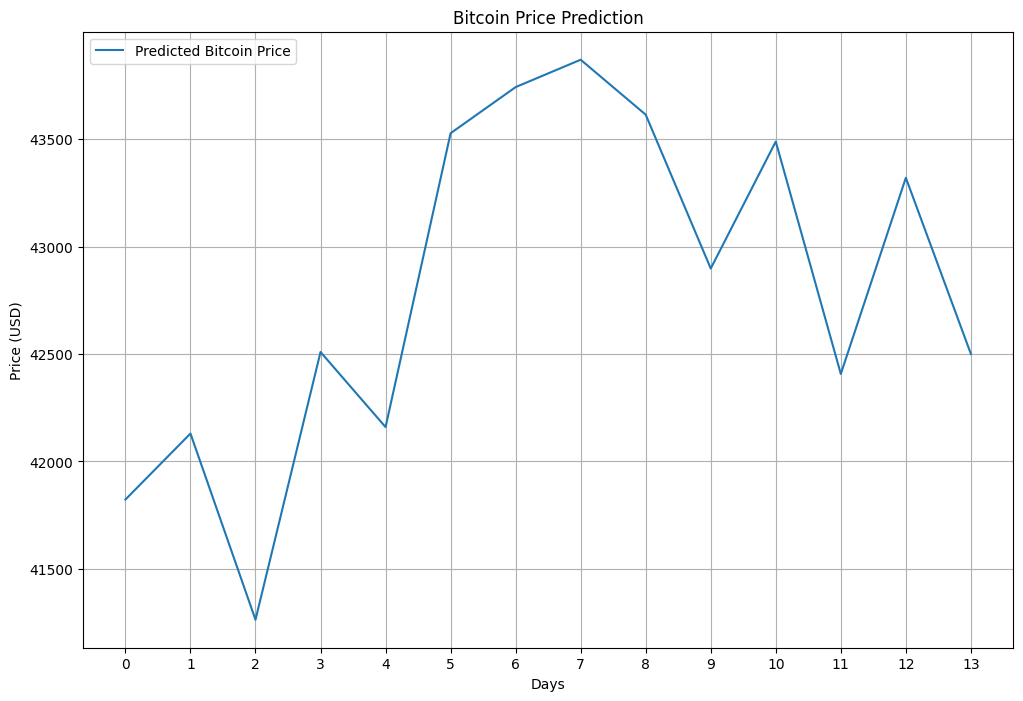

In [21]:
# Plot predicted prices
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Predicted Bitcoin Price')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Bitcoin Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

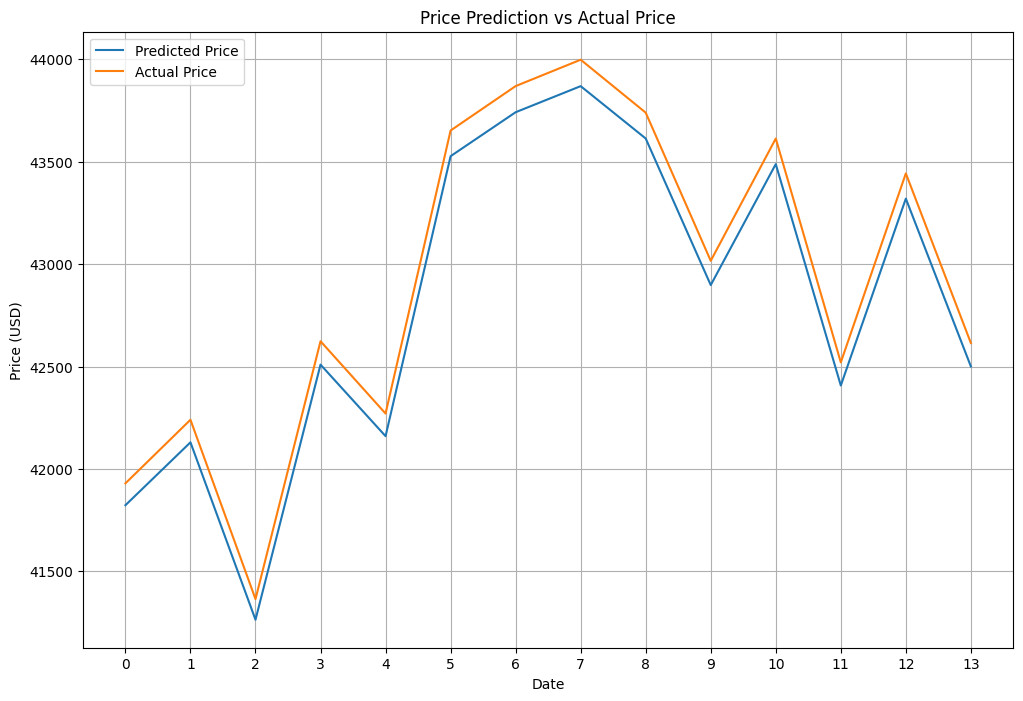

In [22]:
# Compare predicted and actual prices
plt.figure(figsize=(12, 8))
plt.plot(linReg_prediction_Bitcoin, label='Predicted Price')
plt.plot(x_projection_Bitcoin, label='Actual Price')
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.title('Price Prediction vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()